<a href="https://colab.research.google.com/github/mnfibin/AI-ML-Internship-Elevate_Labs/blob/main/Task%208/kmean_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering on Mall Customer Segmentation Dataset

###*BY FIBIN MN*

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from google.colab import files
import io

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("=" * 60)
print("K-MEANS CLUSTERING - MALL CUSTOMER SEGMENTATION")
print("=" * 60)

K-MEANS CLUSTERING - MALL CUSTOMER SEGMENTATION


# STEP 1: UPLOAD AND LOAD DATASET

In [8]:
print("\n[STEP 1] Upload your dataset (CSV file)")
print("-" * 60)

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print(f"\n✓ Dataset loaded successfully: {filename}")
print(f"  Shape: {df.shape}")


[STEP 1] Upload your dataset (CSV file)
------------------------------------------------------------


Saving Mall_Customers.csv to Mall_Customers (1).csv

✓ Dataset loaded successfully: Mall_Customers (1).csv
  Shape: (200, 5)


# STEP 2: EXPLORATORY DATA ANALYSIS


[STEP 2] Exploratory Data Analysis
------------------------------------------------------------

Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100) 

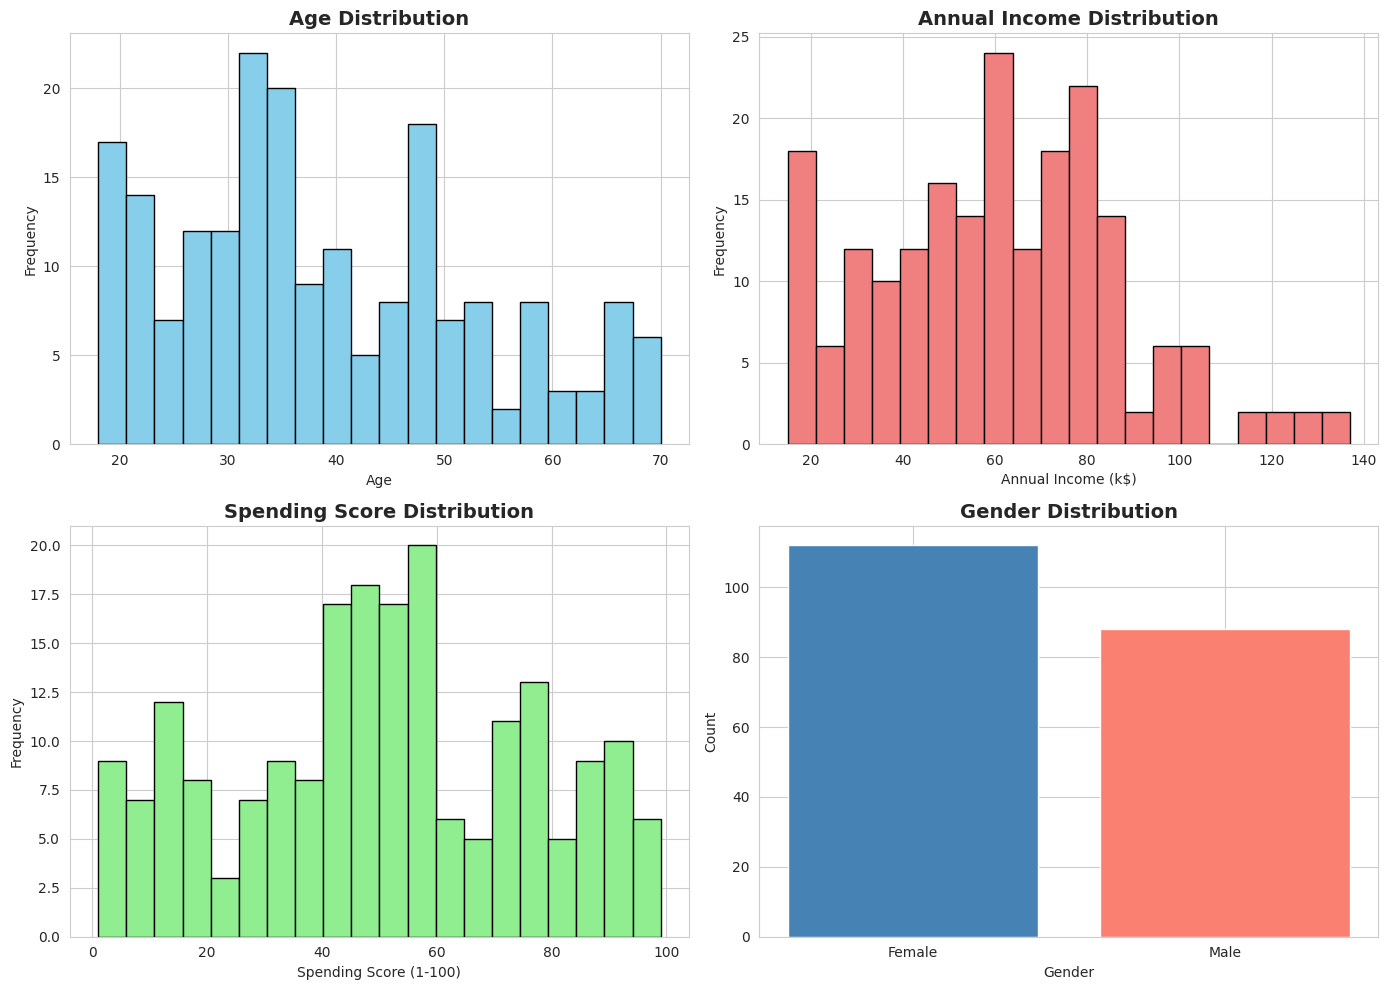

In [11]:
print("\n[STEP 2] Exploratory Data Analysis")
print("-" * 60)

print("\nDataset Preview:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

# Visualize the distribution of features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age distribution
axes[0, 0].hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Annual Income distribution
axes[0, 1].hist(df['Annual Income (k$)'], bins=20, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Annual Income Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Annual Income (k$)')
axes[0, 1].set_ylabel('Frequency')

# Spending Score distribution
axes[1, 0].hist(df['Spending Score (1-100)'], bins=20, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Spending Score Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Spending Score (1-100)')
axes[1, 0].set_ylabel('Frequency')

# Gender distribution
gender_counts = df['Gender'].value_counts()
axes[1, 1].bar(gender_counts.index, gender_counts.values, color=['steelblue', 'salmon'])
axes[1, 1].set_title('Gender Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# STEP 3: DATA PREPROCESSING

In [12]:
print("\n[STEP 3] Data Preprocessing")
print("-" * 60)

# Select features for clustering (excluding CustomerID and Gender)
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

print(f"\nFeatures selected for clustering:")
print(features.columns.tolist())

# Standardize the features (important for K-Means)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

print("\n✓ Features standardized using StandardScaler")
print(f"  Scaled data shape: {features_scaled.shape}")


[STEP 3] Data Preprocessing
------------------------------------------------------------

Features selected for clustering:
['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

✓ Features standardized using StandardScaler
  Scaled data shape: (200, 3)


# STEP 4: ELBOW METHOD - FINDING OPTIMAL K


[STEP 4] Elbow Method - Finding Optimal K
------------------------------------------------------------
K=1: WCSS = 600.00
K=2: WCSS = 389.39
K=3: WCSS = 295.21
K=4: WCSS = 205.23
K=5: WCSS = 168.25
K=6: WCSS = 133.87
K=7: WCSS = 117.01
K=8: WCSS = 103.87
K=9: WCSS = 93.09
K=10: WCSS = 82.39


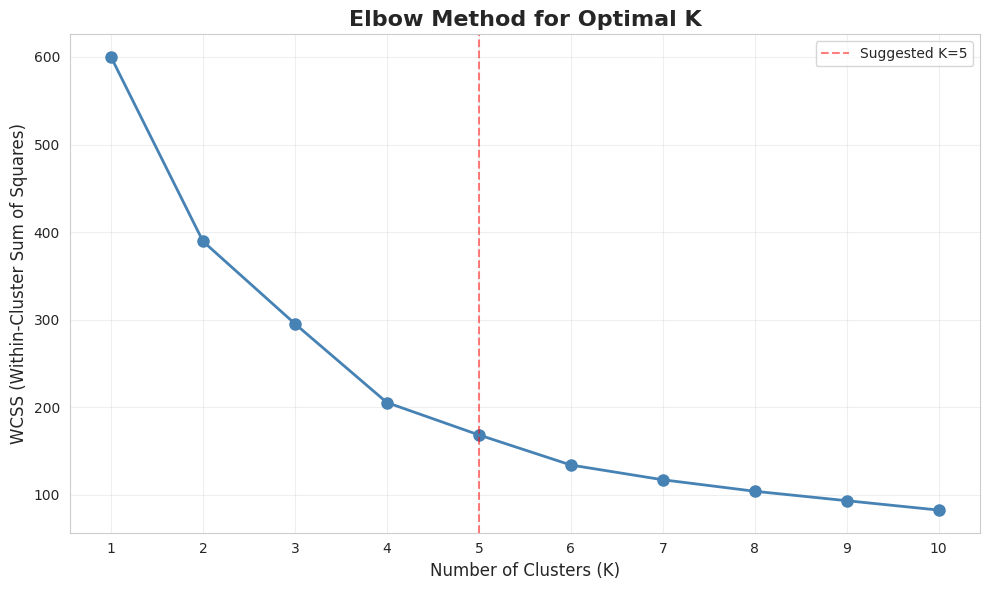


✓ Elbow curve plotted. Look for the 'elbow point' where WCSS starts to level off.


In [13]:
print("\n[STEP 4] Elbow Method - Finding Optimal K")
print("-" * 60)

# Calculate WCSS (Within-Cluster Sum of Squares) for different K values
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)
    print(f"K={k}: WCSS = {kmeans.inertia_:.2f}")

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linewidth=2, markersize=8, color='steelblue')
plt.title('Elbow Method for Optimal K', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(k_range)
plt.grid(True, alpha=0.3)
plt.axvline(x=5, color='red', linestyle='--', alpha=0.5, label='Suggested K=5')
plt.legend()
plt.tight_layout()
plt.show()

print("\n✓ Elbow curve plotted. Look for the 'elbow point' where WCSS starts to level off.")

# STEP 5: SILHOUETTE SCORE ANALYSIS


[STEP 5] Silhouette Score Analysis
------------------------------------------------------------
K=2: Silhouette Score = 0.3355
K=3: Silhouette Score = 0.3578
K=4: Silhouette Score = 0.4040
K=5: Silhouette Score = 0.4166
K=6: Silhouette Score = 0.4284
K=7: Silhouette Score = 0.4172
K=8: Silhouette Score = 0.4082
K=9: Silhouette Score = 0.4177
K=10: Silhouette Score = 0.4066


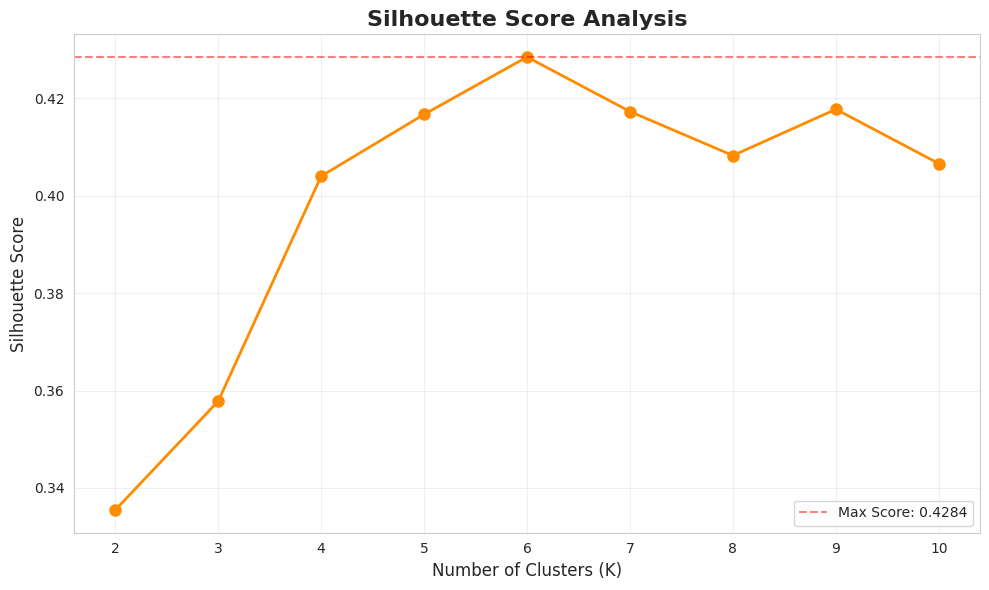


✓ Optimal K based on Silhouette Score: 6


In [14]:
print("\n[STEP 5] Silhouette Score Analysis")
print("-" * 60)

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(features_scaled)
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"K={k}: Silhouette Score = {silhouette_avg:.4f}")

# Plot Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linewidth=2, markersize=8, color='darkorange')
plt.title('Silhouette Score Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(range(2, 11))
plt.grid(True, alpha=0.3)
plt.axhline(y=max(silhouette_scores), color='red', linestyle='--', alpha=0.5,
            label=f'Max Score: {max(silhouette_scores):.4f}')
plt.legend()
plt.tight_layout()
plt.show()

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"\n✓ Optimal K based on Silhouette Score: {optimal_k}")

# STEP 6: APPLY K-MEANS CLUSTERING

In [15]:
print("\n[STEP 6] Apply K-Means Clustering")
print("-" * 60)

# Use optimal K (you can change this based on Elbow method)
optimal_k = 5  # Typically 5 clusters work well for this dataset
print(f"Using K = {optimal_k} clusters")

# Fit K-Means
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(features_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

print(f"\n✓ K-Means clustering completed")
print(f"  Cluster labels assigned: {np.unique(cluster_labels)}")

# Cluster statistics
print("\nCluster Distribution:")
print(df['Cluster'].value_counts().sort_index())

print("\nCluster Centers (Original Scale):")
cluster_centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(cluster_centers_original,
                          columns=['Age', 'Annual Income (k$)', 'Spending Score'])
centers_df.index = [f'Cluster {i}' for i in range(optimal_k)]
print(centers_df.round(2))


[STEP 6] Apply K-Means Clustering
------------------------------------------------------------
Using K = 5 clusters

✓ K-Means clustering completed
  Cluster labels assigned: [0 1 2 3 4]

Cluster Distribution:
Cluster
0    20
1    54
2    40
3    39
4    47
Name: count, dtype: int64

Cluster Centers (Original Scale):
             Age  Annual Income (k$)  Spending Score
Cluster 0  46.25               26.75           18.35
Cluster 1  25.19               41.09           62.24
Cluster 2  32.88               86.10           81.53
Cluster 3  39.87               86.10           19.36
Cluster 4  55.64               54.38           48.85


# STEP 7: CLUSTER VISUALIZATION


[STEP 7] Cluster Visualization
------------------------------------------------------------


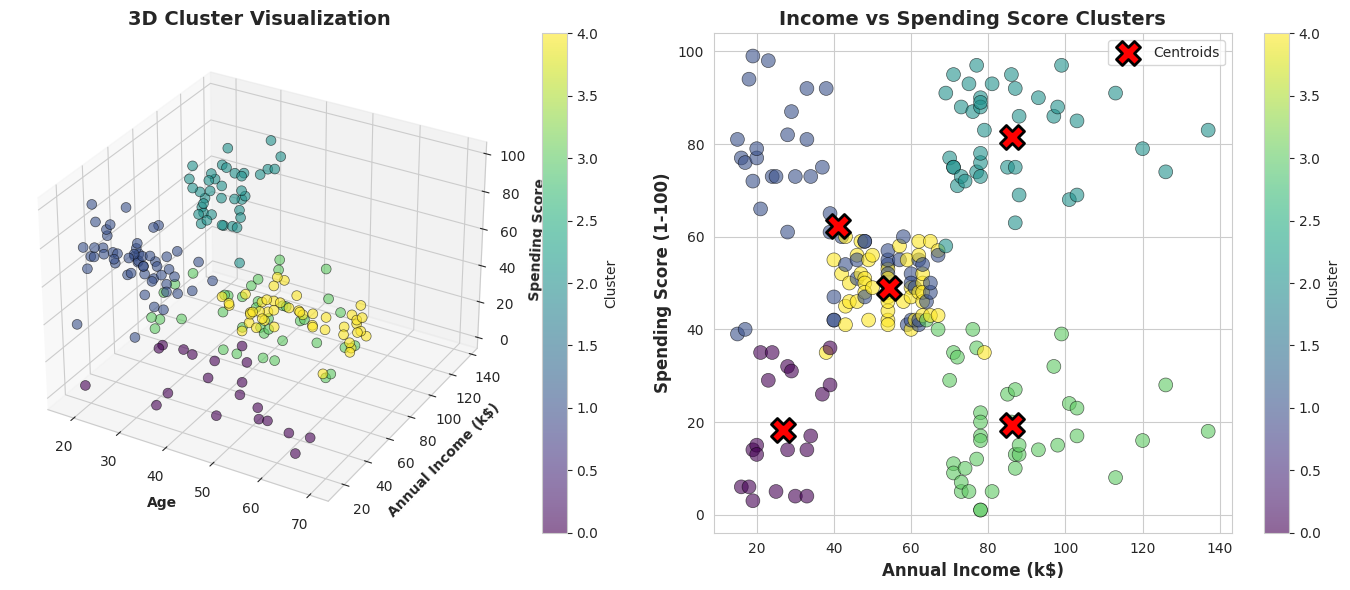

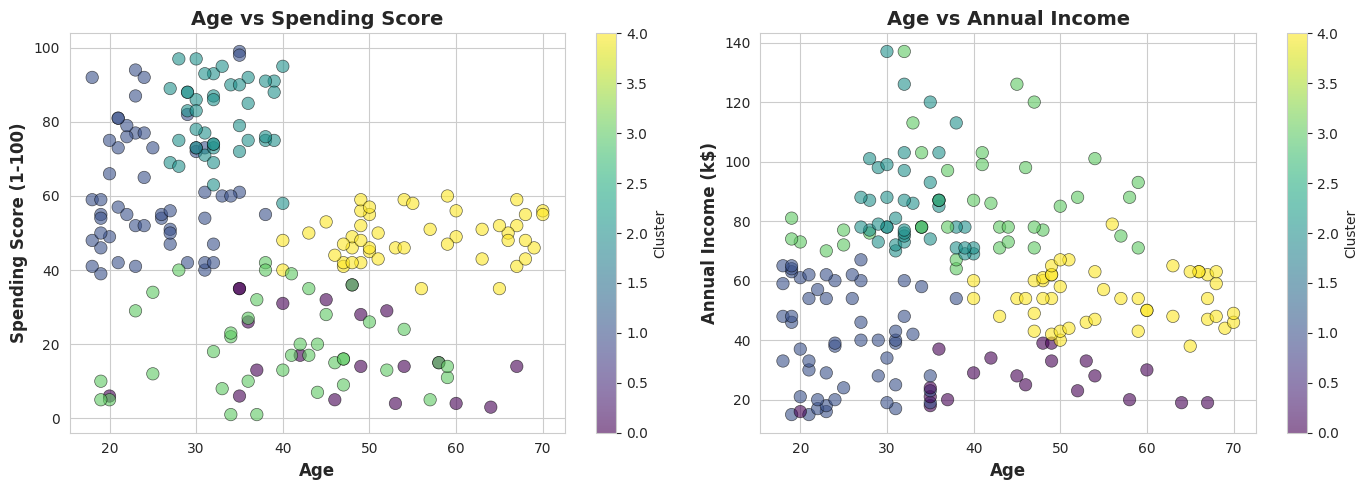

In [16]:
print("\n[STEP 7] Cluster Visualization")
print("-" * 60)

# 3D Visualization (if 3 features)
if features.shape[1] == 3:
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(14, 6))

    # 3D scatter plot
    ax = fig.add_subplot(121, projection='3d')
    scatter = ax.scatter(df['Age'],
                        df['Annual Income (k$)'],
                        df['Spending Score (1-100)'],
                        c=df['Cluster'],
                        cmap='viridis',
                        s=50,
                        alpha=0.6,
                        edgecolors='black',
                        linewidth=0.5)

    ax.set_xlabel('Age', fontweight='bold')
    ax.set_ylabel('Annual Income (k$)', fontweight='bold')
    ax.set_zlabel('Spending Score', fontweight='bold')
    ax.set_title('3D Cluster Visualization', fontsize=14, fontweight='bold')
    plt.colorbar(scatter, ax=ax, label='Cluster')

# 2D visualization: Income vs Spending Score (most insightful)
ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(df['Annual Income (k$)'],
                       df['Spending Score (1-100)'],
                       c=df['Cluster'],
                       cmap='viridis',
                       s=100,
                       alpha=0.6,
                       edgecolors='black',
                       linewidth=0.5)

# Plot cluster centers
centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
ax2.scatter(centers_original[:, 1], centers_original[:, 2],
           marker='X', s=300, c='red', edgecolors='black', linewidth=2,
           label='Centroids')

ax2.set_xlabel('Annual Income (k$)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
ax2.set_title('Income vs Spending Score Clusters', fontsize=14, fontweight='bold')
ax2.legend()
plt.colorbar(scatter2, ax=ax2, label='Cluster')

plt.tight_layout()
plt.show()

# Additional 2D views
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age vs Spending Score
scatter1 = axes[0].scatter(df['Age'],
                           df['Spending Score (1-100)'],
                           c=df['Cluster'],
                           cmap='viridis',
                           s=80,
                           alpha=0.6,
                           edgecolors='black',
                           linewidth=0.5)
axes[0].set_xlabel('Age', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
axes[0].set_title('Age vs Spending Score', fontsize=14, fontweight='bold')
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Age vs Income
scatter2 = axes[1].scatter(df['Age'],
                           df['Annual Income (k$)'],
                           c=df['Cluster'],
                           cmap='viridis',
                           s=80,
                           alpha=0.6,
                           edgecolors='black',
                           linewidth=0.5)
axes[1].set_xlabel('Age', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Annual Income (k$)', fontsize=12, fontweight='bold')
axes[1].set_title('Age vs Annual Income', fontsize=14, fontweight='bold')
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()

# STEP 8: PCA VISUALIZATION (2D)


[STEP 8] PCA Visualization (2D)
------------------------------------------------------------
Explained variance ratio: [0.44266167 0.33308378]
Total variance explained: 0.7757


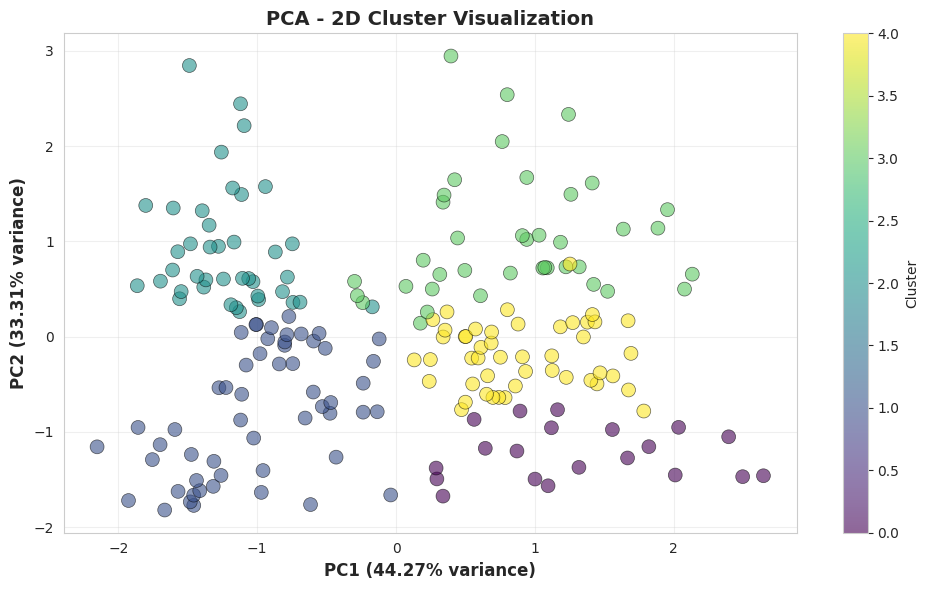

In [17]:
print("\n[STEP 8] PCA Visualization (2D)")
print("-" * 60)

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.4f}")

# Plot PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(features_pca[:, 0],
                     features_pca[:, 1],
                     c=df['Cluster'],
                     cmap='viridis',
                     s=100,
                     alpha=0.6,
                     edgecolors='black',
                     linewidth=0.5)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12, fontweight='bold')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12, fontweight='bold')
plt.title('PCA - 2D Cluster Visualization', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# STEP 9: CLUSTER PROFILING

In [18]:
print("\n[STEP 9] Cluster Profiling")
print("-" * 60)

cluster_profile = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nAverage characteristics of each cluster:")
print(cluster_profile.round(2))

# Cluster interpretation
print("\n" + "=" * 60)
print("CLUSTER INTERPRETATION")
print("=" * 60)

for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    avg_age = cluster_data['Age'].mean()

    print(f"\n🎯 Cluster {i} ({len(cluster_data)} customers):")
    print(f"   • Average Age: {avg_age:.1f} years")
    print(f"   • Average Income: ${avg_income:.1f}k")
    print(f"   • Average Spending Score: {avg_spending:.1f}/100")

    # Provide business interpretation
    if avg_income > 60 and avg_spending > 60:
        print("   • Profile: HIGH INCOME, HIGH SPENDING (Premium customers)")
    elif avg_income < 40 and avg_spending > 60:
        print("   • Profile: LOW INCOME, HIGH SPENDING (Impulsive buyers)")
    elif avg_income > 60 and avg_spending < 40:
        print("   • Profile: HIGH INCOME, LOW SPENDING (Conservative spenders)")
    elif avg_income < 40 and avg_spending < 40:
        print("   • Profile: LOW INCOME, LOW SPENDING (Budget-conscious)")
    else:
        print("   • Profile: MODERATE INCOME & SPENDING (Average customers)")

# Final evaluation
final_silhouette = silhouette_score(features_scaled, cluster_labels)
print("\n" + "=" * 60)
print(f"FINAL EVALUATION")
print("=" * 60)
print(f"Silhouette Score: {final_silhouette:.4f}")
print(f"Number of Clusters: {optimal_k}")
print(f"WCSS (Inertia): {kmeans.inertia_:.2f}")

print("\n✅ Clustering analysis completed successfully!")
print("=" * 60)


[STEP 9] Cluster Profiling
------------------------------------------------------------

Average characteristics of each cluster:
           Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                   
0        46.25               26.75                   18.35
1        25.19               41.09                   62.24
2        32.88               86.10                   81.53
3        39.87               86.10                   19.36
4        55.64               54.38                   48.85

CLUSTER INTERPRETATION

🎯 Cluster 0 (20 customers):
   • Average Age: 46.2 years
   • Average Income: $26.8k
   • Average Spending Score: 18.4/100
   • Profile: LOW INCOME, LOW SPENDING (Budget-conscious)

🎯 Cluster 1 (54 customers):
   • Average Age: 25.2 years
   • Average Income: $41.1k
   • Average Spending Score: 62.2/100
   • Profile: MODERATE INCOME & SPENDING (Average customers)

🎯 Cluster 2 (40 customers):
   • Average Age: 32.9 years
   • Av